In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [71]:
TT = pd.read_csv("C:\\AI(ml&dl)\\jupiter(machine learning)\\Projetcs(ML)\\6_TitanicSurvivalPrediction_NAIVEBAYES\\titanicsurvival.csv")
TT.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [72]:
TT.shape

(891, 5)

In [73]:
TT.duplicated().sum()

123

In [74]:
TT.describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [75]:
TT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [76]:
TT.isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [77]:
TT['Age'] = TT['Age'].fillna(TT['Age'].median())
TT

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,28.0,23.4500,0
889,1,male,26.0,30.0000,1


In [78]:
TT['Sex'] = TT['Sex'].map({'female':0,'male':1}).astype(int)
TT

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,28.0,23.4500,0
889,1,1,26.0,30.0000,1


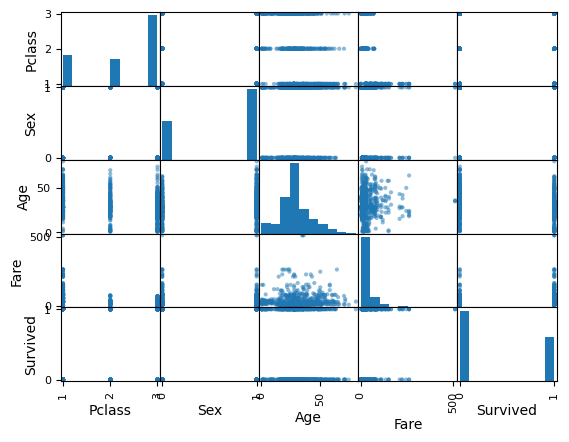

In [79]:
scatter_matrix(TT)
plt.show()

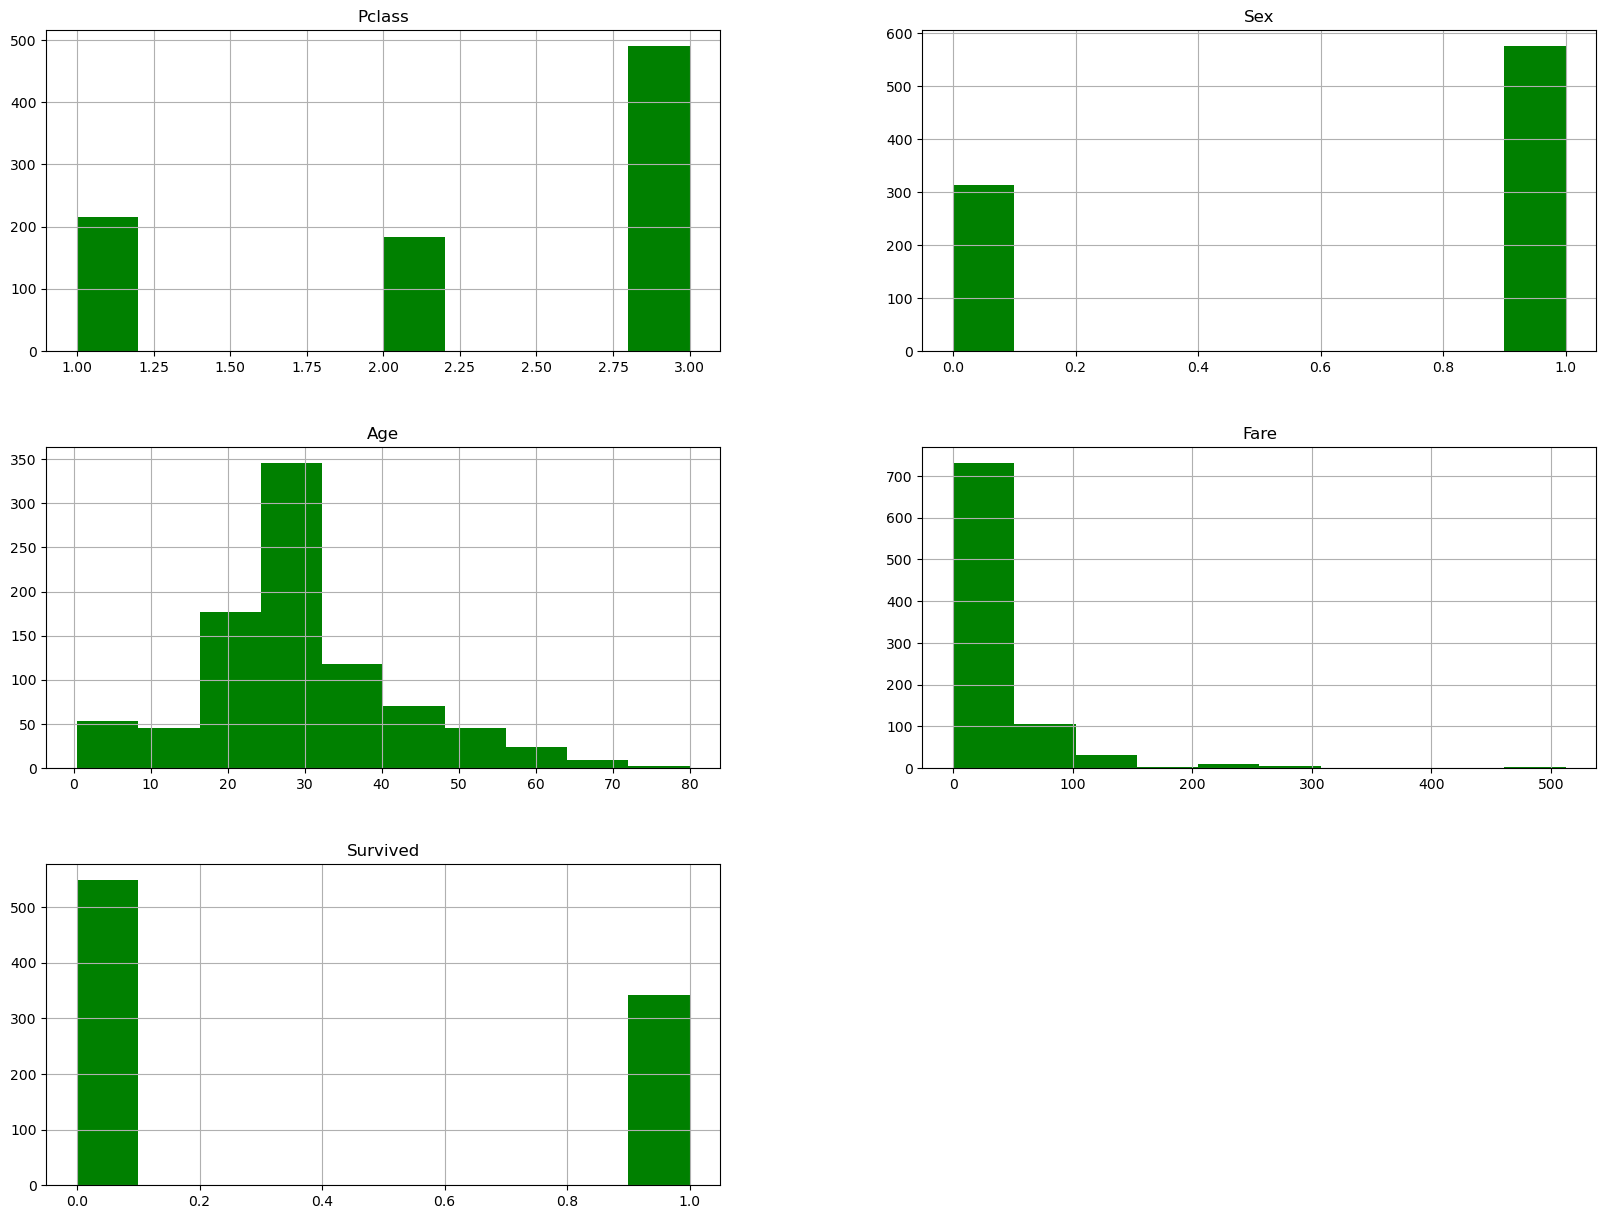

In [80]:
TT.hist(figsize = (20,15),color = 'green')
plt.show()

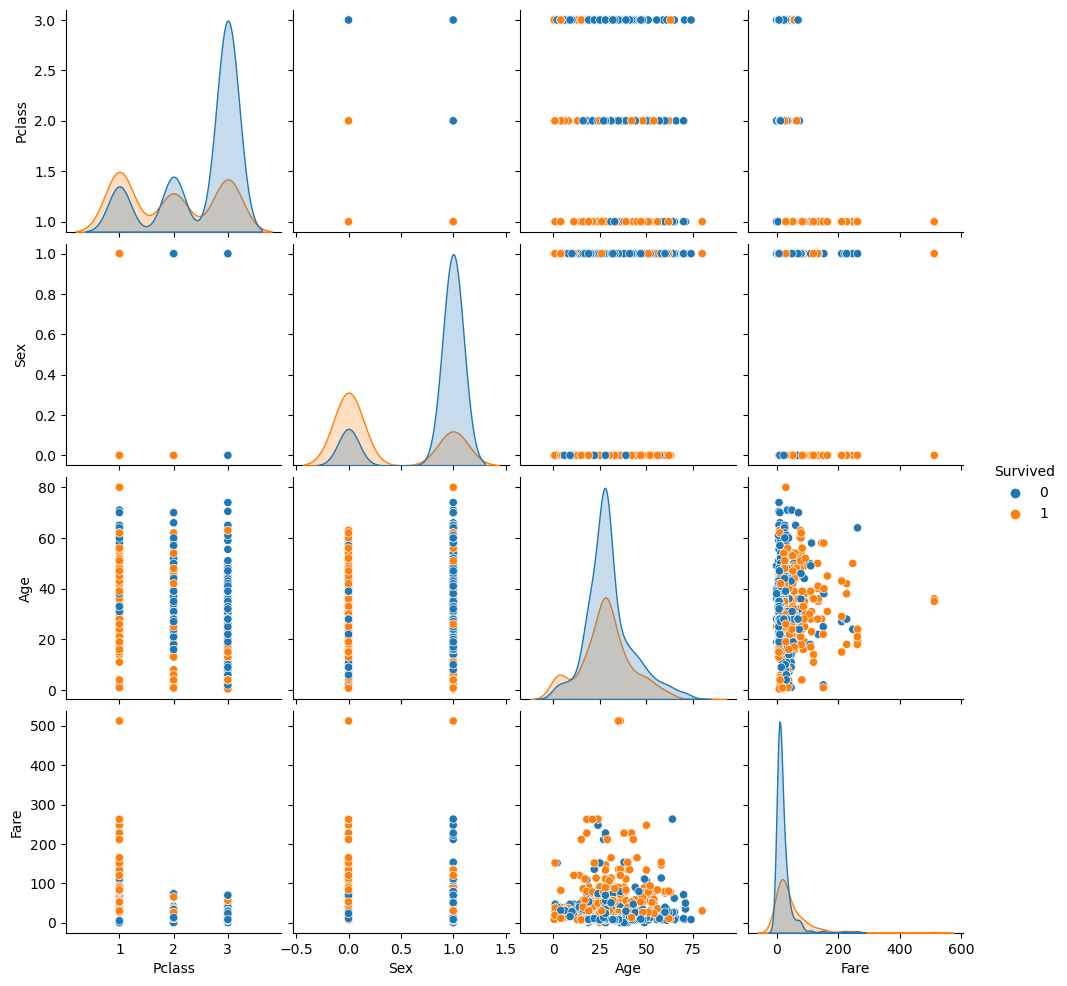

In [81]:
sns.pairplot(TT,hue='Survived')
plt.show()

<AxesSubplot:>

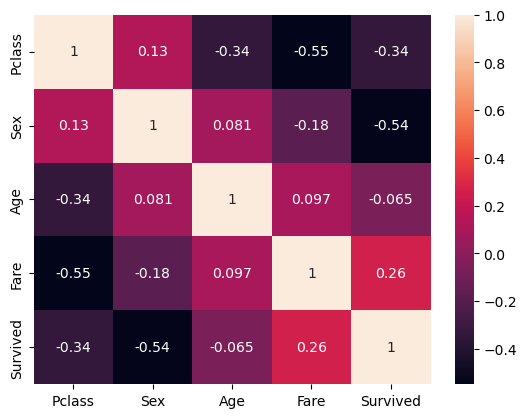

In [82]:
sns.heatmap(TT.corr(),annot=True)

In [83]:
x = TT.iloc[:,:-1]
y = TT.iloc[:,-1]

x.shape


(891, 4)

In [84]:
y.shape

(891,)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
print(x_train.shape,y_train.shape)

(712, 4) (712,)


In [87]:
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier(criterion = 'entropy',max_depth = 8,random_state = 0)
RC.fit(x_train,y_train)
pred = RC.predict(x_test)
print(accuracy_score(y_test,pred)*100)


84.35754189944134


In [88]:
pd.DataFrame(confusion_matrix(y_test,pred),columns = ['prediction No','prediction Yes'],index = ['Actual No','Actual Yes'])

,prediction No,prediction Yes
Actual No,102,8
Actual Yes,20,49


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.86      0.71      0.78        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



In [92]:
pclassNo = int(input('Enter PersonPclass No:'))
gender= int(input('Enter Person Gender 0-female 1-male(0  or 1):'))
age = int(input('Enter Person Age:'))
fare = float(input('Enter Person Fare:'))
person = [[pclassNo,gender,age,fare]]
result = RC.predict(person)

if result == 1:
    print('Person might be Survived')
else:
    print('Person may not be Survived')

Enter PersonPclass No:1
Enter Person Gender 0-female 1-male(0  or 1):0
Enter Person Age:35
Enter Person Fare:53.1000
Person might be Survived


C:\Users\HAI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
